## How to carry out your own NILM experiment

The NILM experiment will be  on nilmtk.api as nilmtk-contrib does.

First, you should import **nilmtk.api** and **specific algorithms from nilmtk.disaggregate**

In [1]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")
from nilmtk.disaggregate import SGN

Then, specify the **experiment configuration** as described in annotation.

SGN
Started training for  SGN
Joint training for  SGN
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
Dropping missing values
Train Jointly
...............SGN partial_fit running...............
First model training for  washing machine
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     ConstantPad1d-1               [-1, 1, 209]               0
            Conv1d-2              [-1, 30, 200]             330
              ReLU-3              [-1, 30, 200]               0
     ConstantPad1d-4              [-1, 30, 207]               0
            Conv1d-5              [-1, 30, 200]           7,230
              ReLU-6              [-1, 30, 200]               0
     ConstantPad1d-7              [-1, 30, 205]               0
            Conv1d-8              [-1, 40, 200]           7,240
              ReLU-9              [-1, 40, 200]    

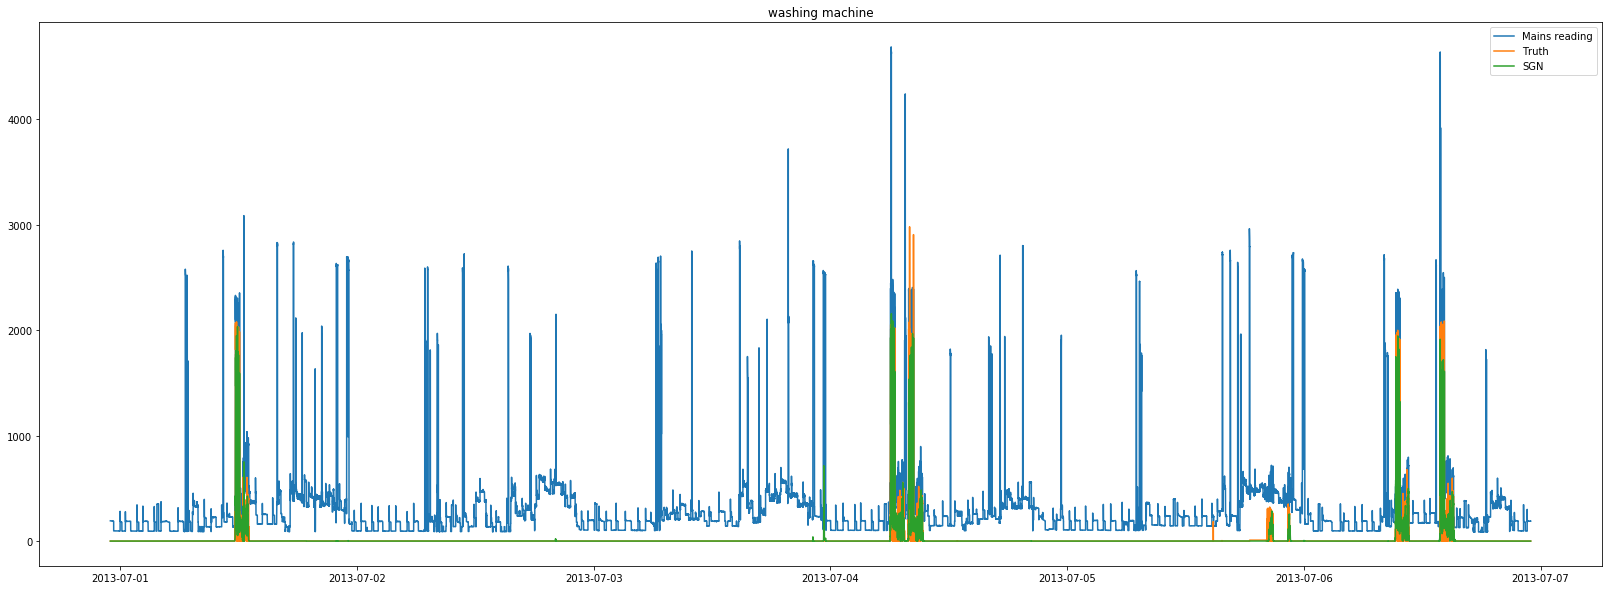

In [2]:
e = {
  # Specify power type, sample rate and disaggregated appliance
  'power': {
    'mains': ['active'],
    'appliance': ['active']
  },
  'sample_rate': 6,
  'appliances': ['washing machine'],
  # Universally no pre-training
  'pre_trained':False,
  # Specify algorithm hyper-parameters
  'methods':{"SGN":SGN({'n_epochs':3,'batch_size':256})},
  # Specify train and test data
 'train': {
    'datasets':{
      'ukdale': {
        'path': '/mnt/ukdale.h5',
        'buildings': {
              1: {
                    'start_time': '2013-06-01',
                    'end_time': '2013-07-01'
              }
          }
        },      
    }
  },
  'test': {
    'datasets':{
      'ukdale': {
        'path': '/mnt/ukdale.h5',
        'buildings': {
              1: {
                    'start_time': '2013-07-01',
                    'end_time': '2013-07-07'
              }
          }
        },
        
  },
  # Specify evaluation metrics
  'metrics': ['mae', 'f1score', 'recall', 'precision', 'nep' , 'omae', 'MCC']
  }
}

API(e)

From above results, we can know the **inferring and training time consumption** of specific neural network on the given dataset as well as **emory usage**. **Classification metrics(namely recall, precision, and MCC)** and **regression metrics(mae, omae, nep)** will also be reported.And **detailed energy disaggregation result and ground truth** can be found in .csv file under the same folder.